In [ ]:
from guacamol.distribution_matching_generator import DistributionMatchingGenerator
from guacamol_baselines.random_smiles_sampler.distribution_learning import RandomSmilesSampler 
from guacamol.assess_distribution_learning import assess_distribution_learning
import numpy as np
from rdkit import Chem
from Levenshtein import distance


In [ ]:
class TrickySampler(DistributionMatchingGenerator):
    def __init__(self, smi_file):
        self.smi_file = smi_file
        with open(smi_file) as f:
            self.train_list = np.array(f.read().split())
        
        self.train_set = set(self.train_list)
        self.train_size = self.train_list.shape[0]
    
    def generate(self, number_samples):
        smiles = list()
        
        total = 0
        while len(smiles) < number_samples:
            idx = np.random.choice(self.train_size)
            mol =  Chem.MolFromSmiles(self.train_list[idx])
            cansmi = Chem.MolToSmiles(mol)
            
            min_d = 1e9
            min_smiles = None
            for i in np.random.permutation(len(cansmi)):
                mut = cansmi[:i] + 'C' + cansmi[i:]
                mutmol = Chem.MolFromSmiles(mut)
                if mutmol is None:
                    continue
                    
                mutcan = Chem.MolToSmiles(mutmol)
                d = distance(cansmi, mutcan)
                
                if (d < min_d) and not (mutcan in self.train_set):
                    min_d = d
                    min_smiles = mutcan
                    if min_d == 1:
                        break
            
            # check if valid molecule has been found
            if min_smiles is not None:
                smiles.append(min_smiles)
                

            total += 1
            if total % 100 == 0:
                print(len(smiles)/total,total,  ' '*50, end='\r')
        return list(smiles)

    
smi_train = './data/guacamol_v1_train.smiles'
smi_test = './data/guacamol_v1_test.smiles'

tricky_sampler =  TrickySampler(smi_train)

In [ ]:
sampled = tricky_sampler.generate(10000)
sampled_file = './distribution_results/tricky_smiles.txt'
with open(sampled_file, 'w') as f:
    for s in sampled:
        print(s, file=f)
sampled

['C=CC1CC1(NC(=O)C1CC2CN1C(=O)C(C1CCCC1)NC(=CO)N1CC(C1)OCCCC=Cc1cc3ccc(OC)cc3nc1O2)C(=O)NS(=O)(=O)C1CC1',
 'COCc1ccc(N=C(Nc2ccccc2)c2cccc(OC)c2)cc1',
 'Cc1ccc(CNCC2(F)CCCN(C(=O)C34CC5CC(C)(CC(Br)(C5)C3)C4)CC2)nc1',
 'COC(=O)C1(C)CCC2C3=CC1CCC(C)C3(C)CC1c3ccccc3NC21',
 'O=C(O)c1ccc2nc(-c3ccccc3)c(Cc3ccc4c(c3)OCO4)nc2c1',
 'CCOC(=O)C(N)CSCC(=O)NC',
 'Cc1ccc(-c2c3c(=O)n(C)c(=O)n(C)c3cn2CCc2ccccn2)cc1',
 'CNS(=O)(=O)N1CC(C)(N2CCc3c(-c4cnc(=N)[nH]c4)nc(CN4CCOCC4C)nc32)C1',
 'COC(=O)Oc1cc(Br)cc(C(=O)N(C)CCCN(CCC(=O)O)C(=O)c2cc(Br)cc(OC(=O)OC)c2OC(=O)OC)c1OC(=O)OC',
 'Cc1ccc(C)c(-n2ccnc2SCCC(=O)Nc2cccc(S(=O)(=O)NC3=NCCC3)c2)c1',
 'CC(C)NC(=O)c1sc2ncnc(N3CCC(COCCNC4CCCC4)CC3)c2c1-c1ccccc1',
 'O=c1c2ccccc2nc(-c2ccccc2)n1CCC(O)COc1cccc2[nH]c3ccccc3c12',
 'CCOc1cccc(NC(=O)Cc2nc(NC3CCOCC3)cc(=O)[nH]2)c1',
 'CCn1cc(C(=O)NCCC(C)C)c(=O)c2cc(S(=O)(=O)N(C)C3CCCCCC3)ccc21',
 'COC(=O)CCCc1cccc(C)c1',
 'c1ccc2cc(C3(Cn4ccnc4)COCCCO3)ccc2c1',
 'Oc1ccc(C2CNc3ccccc3C3NCCC23)cc1',
 'Cc1cnc(CCN(C)C2CCN(CCn3cc(C

In [ ]:
random_sampler = RandomSmilesSampler(tricky_sampler.train_list)

NameError: name 'distance' is not defined

In [ ]:
import pandas as pd
df_sampled = pd.DataFrame(sampled, columns=['SMILES'])
sampled_csv = './distribution_results/tricky_smiles.csv'
df_sampled.to_csv(sampled_csv)

In [ ]:
pd.read_csv(sampled_csv, usecols=['SMILES'], squeeze=True).astype(str).tolist()

['CCC(C)c1cccc2c1C(=O)N(COc1c(Cl)cccc1Cl)S2(=O)=O',
 'CCc1cc(-c2cc(C)c3cc(C(C)C)ccc(C)c2-3)c2c(C)ccc(C(C)C)cc1-2',
 'CCN(C)CC#CC=C1c2ccccc2C=Cc2ccccc21',
 'CCOc1cc2c(cc1O)-c1cc3ccc(O)c(OC)c3c[n+]1CC2',
 'CN=C(N)NCCCC(NC(=O)C(CO)NC(=O)C1CCCN1)C(=O)NCC(=O)NC(CC(=O)O)C(=O)NC(Cc1c[nH]c2ccccc12)C(=O)O',
 'COc1ccc(-c2nnc(S)n2N=Cc2ccccc2Cl)cc1',
 'CCCCCCCCCCCCCN(C)C(=O)Cn1cc(Cc2cnc(=O)n(CC(=O)OCC)c2)c(=O)nc1SCc1ccc(F)cc1',
 'CCc1ccc(Nc2nc(N(C)C)c(C(=O)Nc3sc4c(c3C(N)=O)CCCC4)s2)cc1',
 'CCCCCN1C(=CC2=C([O-])C(=CC3=[N+](CCCC)c4ccc(Br)cc4C3(C)C)C2=O)C(C)(C)c2cc(Br)ccc21',
 'CCC12CCC3C(CCC4CC5(CCC43C)CN(Cc3ccc4ccccc4c3)CC(=O)O5)C1CCC2=O',
 'CCCCCCCn1cc(C(=O)NC23CC4CC(CC(C4)C2)C3)c(=O)cc1-c1ccccc1',
 'O=C(C(=CO)Nc1ccc(O)cc1)c1c[nH]c2ccc(Cl)cc12',
 'O=C(NC1CCN(C(=O)N2CCc3cc(C(=CO)NC4CC4)sc3-c3ccccc32)CC1)c1cccnc1N1CCCC1',
 'OC=C(Nc1ccc(I)cc1)N1CCCN(Cc2ccccc2F)C1',
 'CCc1csc(NC(=O)c2ccc(Br)s2)n1',
 'O=c1[nH]c2ccccc2c(-c2ccc(Cl)cc2)c1C1=NN(C(=CO)CCCF)C(c2ccc(Cl)cc2)C1',
 'CCOC(=O)C1=C(c2ccc3c(c2)OCO3)

In [ ]:
with open(smi_test) as f:
    test_smiles = f.read().split('\n')
    test_smiles = [x for x in test_smiles if x]
    
df_test = pd.DataFrame(test_smiles, columns=['SMILES'])
test_csv = './distribution_results/test_smiles.csv'
df_test.to_csv(test_csv)

rel = pd.read_csv(test_csv, usecols=['SMILES'], squeeze=True).astype(str).tolist()

In [ ]:
# benchmark with train
assess_distribution_learning(tricky_sampler, smi_train, json_output_file='./distribution_results/tricky_train_lev.json')

In [ ]:
assess_distribution_learning(random_sampler, smi_train, json_output_file='./distribution_results/random_train.json')

In [ ]:
assess_distribution_learning(tricky_sampler, smi_test, json_output_file='./distribution_results/tricky_test.json')
assess_distribution_learning(random_sampler, smi_test, json_output_file='./distribution_results/random_test.json')

In [ ]:
import json
with open('./distribution_results/tricky_train_lev.json')  as f:
    results = json.load(f)
for b in results['results']:
    print(f"{b['benchmark_name']}: {b['score']}")

Validity: 1.0
Uniqueness: 0.9993
Novelty: 1.0
KL divergence: 0.98226763364363
Frechet ChemNet Distance: 0.8706408104237203


In [ ]:
import json
with open('./distribution_results/random_train.json')  as f:
    results = json.load(f)
for b in results['results']:
    print(f"{b['benchmark_name']}: {b['score']}")

Validity: 1.0
Uniqueness: 0.9954
Novelty: 0.0
KL divergence: 0.9987602851686136
Frechet ChemNet Distance: 0.9269509797277268


In [ ]:
import smileseval as se
from rdkit import Chem
from rdkit.Chem.Descriptors import MolLogP

In [ ]:
sa = se.calculateScore

sas =  []
logps = []
for i in range(1,400):
    m = Chem.MolFromSmiles('C'* i)
    sas.append(sa(m))
    logps.append(MolLogP(m))
    
    

KeyboardInterrupt: 

In [ ]:
m = Chem.MolFromSmiles('C'*30)
MolLogP(m) - sa(m)

10.853177912424377

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sas)
plt.show()
plt.plot(logps)

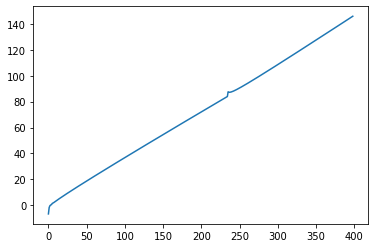

In [ ]:
plt.plot(np.array(logps) - np.array(sas))

In [ ]:
from Levenshtein import distance
from functools import partial
from multiprocessing import Pool

with Pool(30) as pool:
    s = sampled[0]
    res = pool.map(partial(distance, s), tricky_sampler.train_list) 

In [ ]:
min(res)

1